In [3]:
#import useful tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


#import file
glass = pd.read_csv('glass.csv')




In [4]:
#read the data by first knowing what it is
glass.head()
#find useful things ---> what element there is and what type of glass it is



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
#We try to make it easy as setting all those type into 2 categories:
#Window Glass for type 1,2,3
#Household Glass for 5,6,7
#Assign this idea into the form
glass['Binary_Type'] = glass.Type.map({1:0,2:0,3:0,5:1,6:1,7:1})
glass.sort_values(by = 'Al',inplace = True)
glass.head()
glass.reset_index(drop = True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Binary_Type
0,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0
1,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1
2,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0
3,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0
4,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1
211,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1
212,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1


In [6]:
#Choose one topic to analyze its relationship with type
#This step is important because many machine learning tools expect the input to be in this two-dimensional, column-like shape, even if there's only one feature
x = np.array(glass['Al']).reshape(-1,1)
y = np.array(glass['Binary_Type']).reshape(-1,1)
#Use skylearn to do the regression
#the meaning of logistic regression is that the log of the property is linear(log is used so that the line can have a broader choice of coeff)
logreg = LogisticRegression()
logreg.fit(x,y)
#show the result
#1. Only the prediction
pred = logreg.predict(x)
logreg.coef_, logreg.intercept_



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

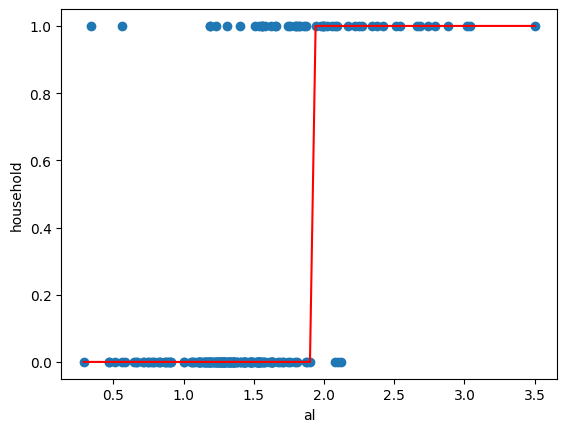

In [10]:

#glass.sort_values( by = 'Al', inplace=True)

# Plot the class predictions.

plt.scatter(glass.Al, glass.Binary_Type)
plt.plot(glass.Al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [14]:
#2. Calculate The probability
logreg.predict_proba(x)[:5] #with the function predict_prob()

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403]])

In [18]:
glass['Binary_Type_prob'] = logreg.predict_proba(x)[:,1]
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Binary_Type,Binary_Type_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0.011884


Text(0, 0.5, 'Binary Type')

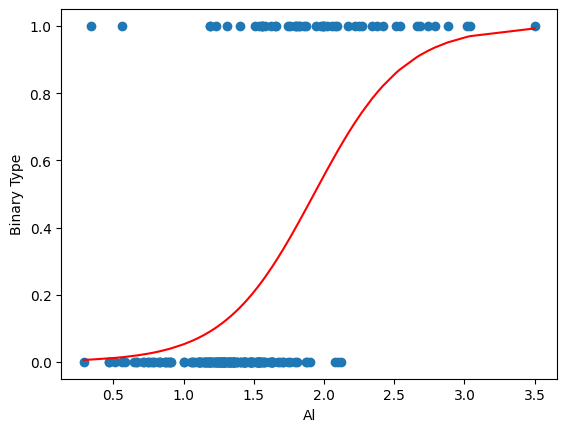

In [21]:
# Plot the predicted probabilities.
#scatter used to plot scatter plot
#plot use to plot curve
plt.scatter(glass.Al, glass.Binary_Type)
plt.plot(glass.Al, glass.Binary_Type_prob, color = 'red')
plt.xlabel('Al')
plt.ylabel('Binary Type')

In [ ]:
#How good is our data?
#how do we know how good our classification is?
#Recall: Confusion matrix: a matrix that summarize the number of (#actual1,#predict1)(#actual1,#predict0)(#actual0,#predict1)(#actual0,#predict0)

In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred)
cm

array([[160,   3],
       [ 25,  26]])

In [24]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy

0.8691588785046729

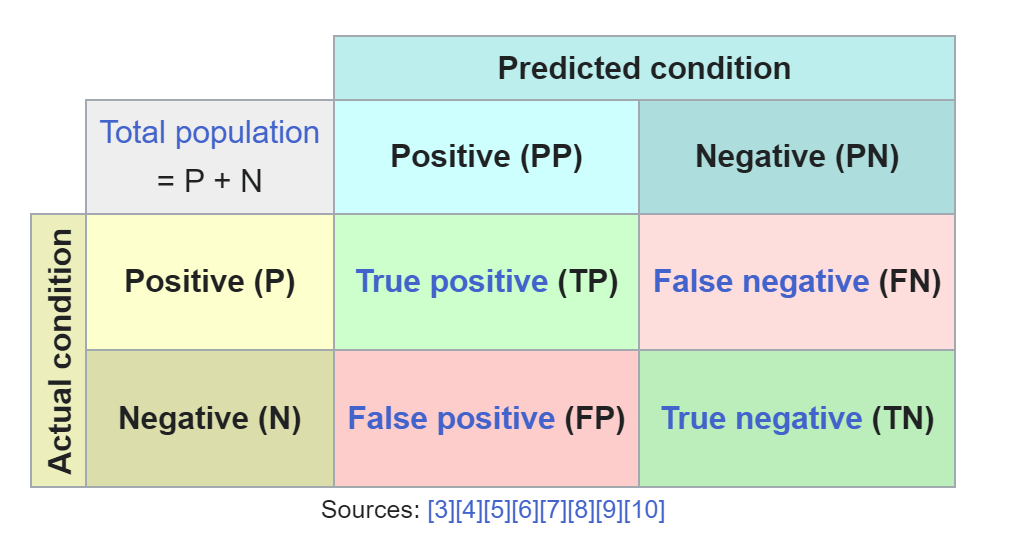

In [ ]:

​
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.896551724137931

In [25]:

Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.5098039215686274

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred)



0.8691588785046729

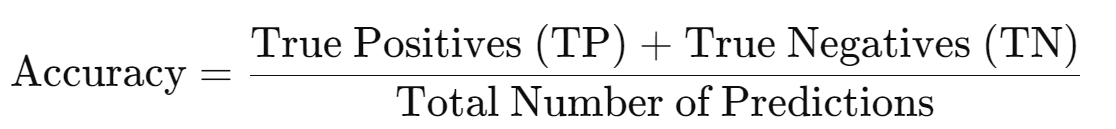

In [29]:
precision_score(y_true = y, y_pred = pred)

0.896551724137931

In [30]:
recall_score(y,pred)

0.5098039215686274

In [ ]:
#ROC: we plot two different data
#1. Recall = True positive rate = TR\(All True)
#2. FPR = FP/(TN + FP)
#we plot these values on a graph where the positive rate will be on the y axis and your false positive rate on the x axis
#we want this curve to be as close to one or as sharp as possible 1, so that it is a perfect ROC curve.
#The threshold is the point at which the probabilities resulting from a binary classifier are considered to predict the positive class.

The ROC curve provides a visual representation of the trade-off between sensitivity (TPR) and specificity (1 - FPR) for different threshold values. A curve that is closer to the top-left corner indicates better performance, as it represents higher sensitivity and lower false positive rate across various threshold settings.

Area Under the Curve (AUC): AUC is calculated by measuring the area under the ROC curve. AUC provides a single scalar value summarizing the model's performance. Higher AUC values indicate better discrimination ability of the model across all threshold settings, with 1 being perfect and 0.5 indicating no discrimination ability (random guessing).

## K Means

1. Pick a value for k (the number of clusters to create)
2. Initialize k 'centroids' (starting points) in your data
3. Assign each point to the nearest centroid. These are your clusters.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3-4 until your centroids converge.

# Metrics for assessing your clusters

**Inertia** -- sum of squared errors for each cluster
- ranges from 0 to very high values
- low inertia = dense clusters
- Ranges from -inf to +inf

**Silhouette Score** -- measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated


### Inertia

sum of squared errors for each cluster

- low inertia = dense cluster

$$\sum_{j=0}^{n} (x_j - \mu_i)^2$$

where $\mu_i$ is a cluster centroid. (K-means explicitly tries to minimize this.)

`.inertia_` is an attribute of sklearn's kmeans models.


### Silhouette Score

measure of how far apart clusters are
- ranges from -1 to 1
- high silhouette Score = clusters are well separated

The definition is a little involved$^*$, but intuitively the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate it in sklearn with `metrics.silhouette_score(X_scaled, labels, metric='euclidean')`.

* <https://en.wikipedia.org/wiki/Silhouette_(clustering)>


### Demo

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


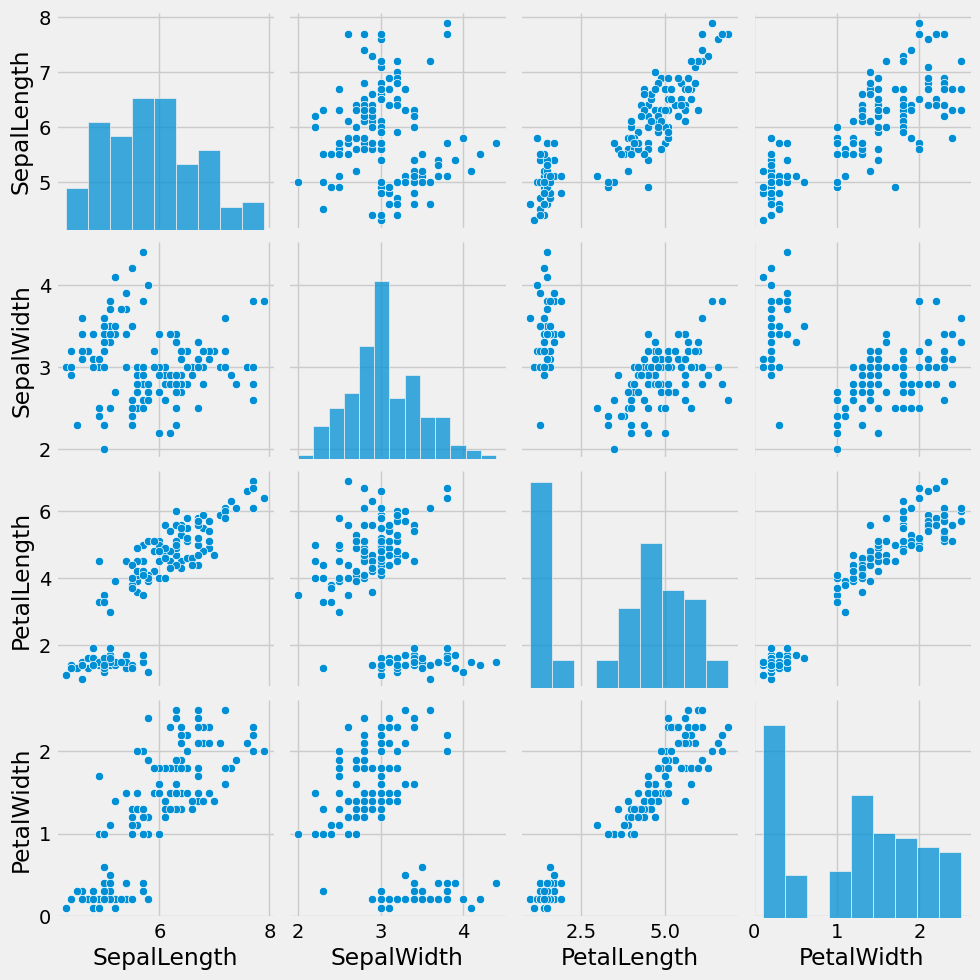

In [3]:
cols = df.columns[:-1]
sns.pairplot(df[cols])

Next, since each of our features have different units and ranges, let's do some preprocessing:

In [8]:
#Uniform the data so that some column doesn't affect more than the others
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
pd.DataFrame(X_scaled, columns=cols).describe()
#pd.DataFrame(X_scaled, columns=cols).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Now that we've formatted our data and understand its structures, we can finally go ahead and cluster.

We're going to set k = 2, given the pattern we were seeing above in our graphs.

In [13]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [16]:
print(labels,centroids)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1] [[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.545      0.36333333 0.6620339  0.65666667]]


In [17]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.6294675561906644

How to choose Value of k?

In [18]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Score')

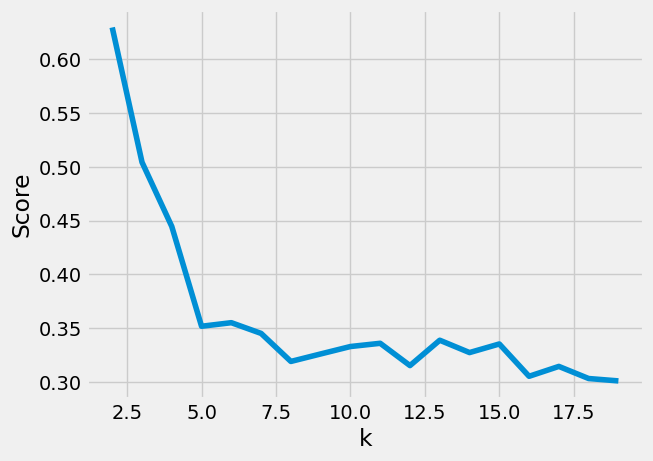

In [19]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [20]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

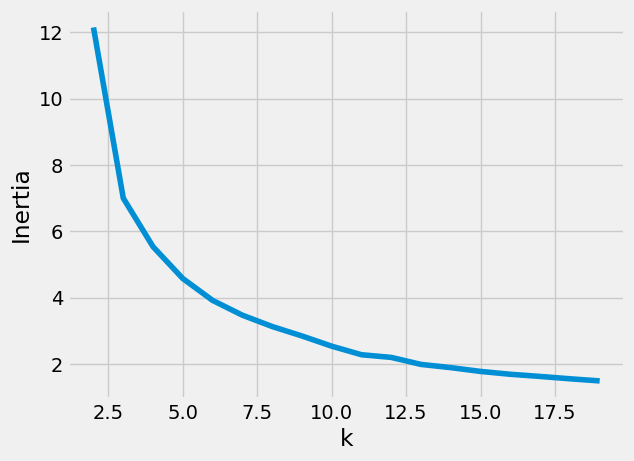

In [21]:
plt.plot(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

The curve we obtain is called the Elbow curve. We want to stop changing the value of k when the distance between two k values does not change much.


...and we're done! You've completed your first clustering analysis.

Let's see how it looks. First, let's put the labels columns into our dataframe

In [22]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,5
2,4.7,3.2,1.3,0.2,Iris-setosa,5
3,4.6,3.1,1.5,0.2,Iris-setosa,5
4,5.0,3.6,1.4,0.2,Iris-setosa,2


Let's plot each cluster in a different color. Seaborn has a 'hue' parameter we can use for this.

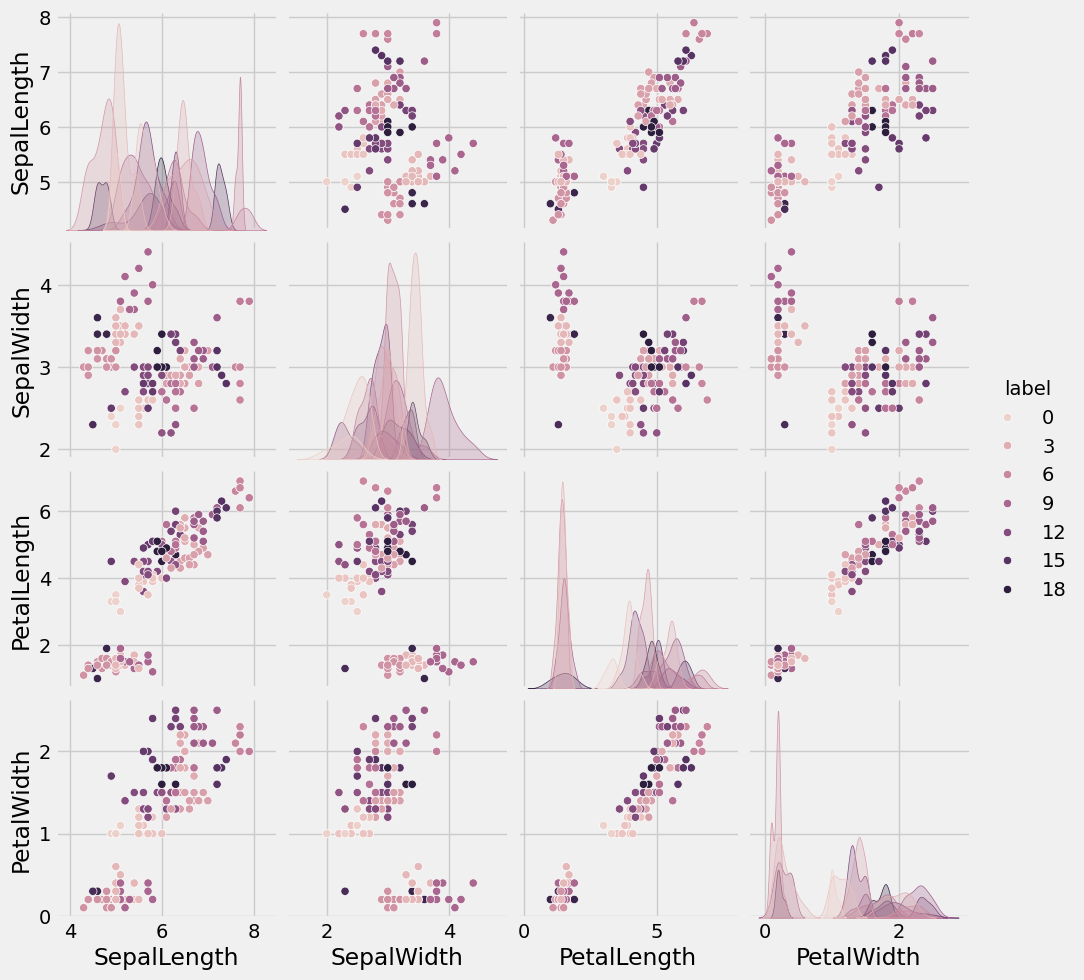

In [23]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')

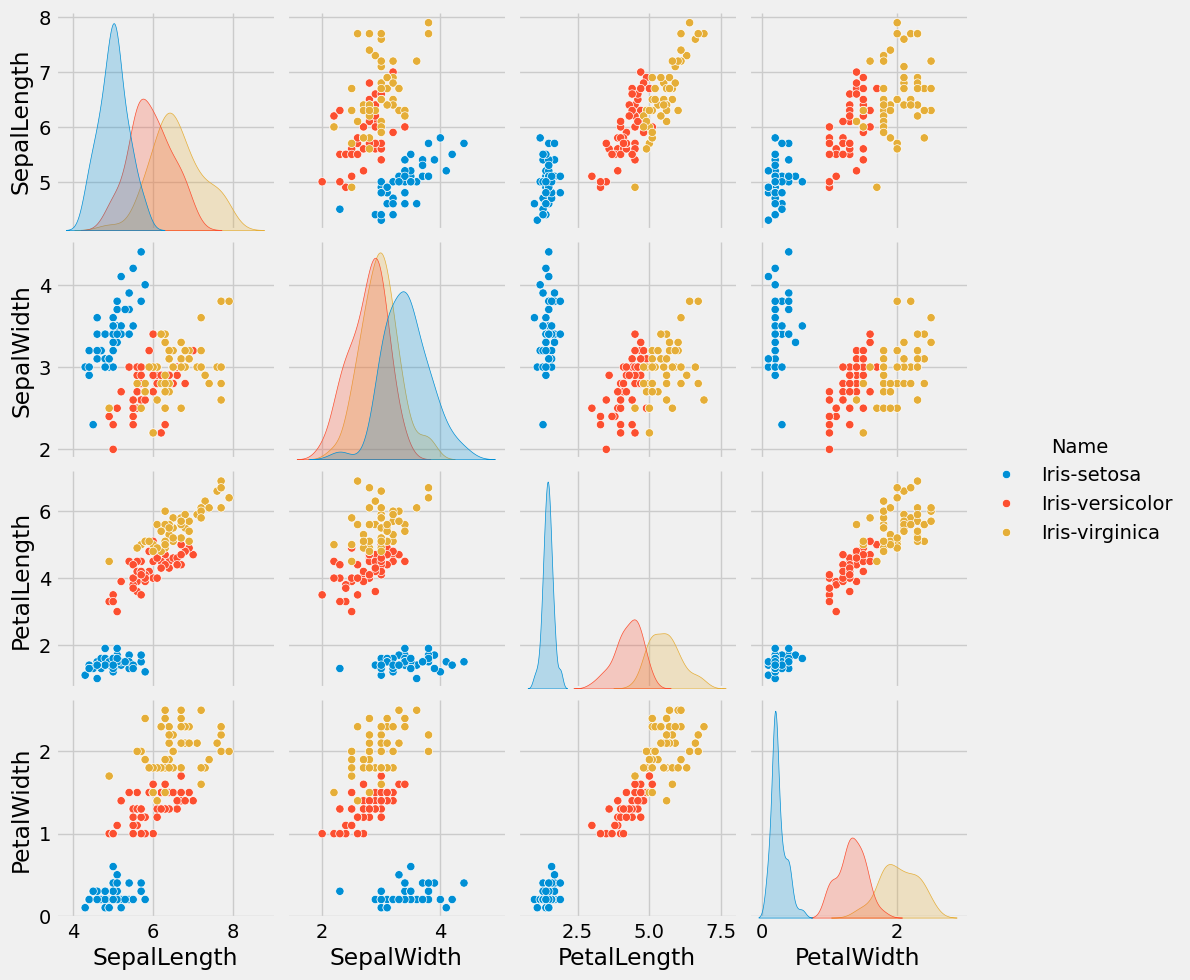

In [24]:
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='Name')